# Data Mining
## Heart Disease Classifier

By Avestura (me@avestura.dev, github.com/avestura)

In [1]:
import numpy as np
import itertools 
import pandas as pd
import math
from sklearn import svm, metrics

### Features Description

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [2]:
cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'to_predict']

data = pd.read_csv("processed.cleveland.data", names=cols)

# preprocess
valid_num_major_vessels_vect = data[data["num_major_vessels"] != '?']
mean_valid_major_vessels = math.ceil((valid_num_major_vessels_vect["num_major_vessels"].astype('float')).mean())
data['num_major_vessels'].replace('?', mean_valid_major_vessels, inplace=True)

data['num_major_vessels'] = data['num_major_vessels'].astype('float')

In [3]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,to_predict
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# change values

data['sex'].replace(0, 'female', inplace=True)
data['sex'].replace(1, 'male', inplace=True)

data['chest_pain_type'].replace(1, 'typical angina', inplace=True)
data['chest_pain_type'].replace(2, 'atypical angina', inplace=True)
data['chest_pain_type'].replace(3, 'non-anginal pain', inplace=True)
data['chest_pain_type'].replace(4, 'asymptomatic', inplace=True)

data['fasting_blood_sugar'].replace(0, 'lower than 120mg/ml', inplace=True)
data['fasting_blood_sugar'].replace(1, 'greater than 120mg/ml', inplace=True)

data['rest_ecg'].replace(0, 'normal', inplace=True)
data['rest_ecg'].replace(1, 'ST-T wave abnormality', inplace=True)
data['rest_ecg'].replace(2, 'left ventricular hypertrophy', inplace=True)

data['exercise_induced_angina'].replace(0, 'no', inplace=True)
data['exercise_induced_angina'].replace(1, 'yes', inplace=True)

data['st_slope'].replace(1, 'upsloping', inplace=True)
data['st_slope'].replace(2, 'flat', inplace=True)
data['st_slope'].replace(3, 'downsloping', inplace=True)

data['thalassemia'].replace('?', 'unknown', inplace=True)
data['thalassemia'].replace('3.0', 'normal', inplace=True)
data['thalassemia'].replace('6.0', 'fixed defect', inplace=True)
data['thalassemia'].replace('7.0', 'reversable defect', inplace=True)

data['to_predict'][data['to_predict'] != 0] = 1

In [5]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,to_predict
0,63.0,male,typical angina,145.0,233.0,greater than 120mg/ml,left ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,lower than 120mg/ml,left ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,1
2,67.0,male,asymptomatic,120.0,229.0,lower than 120mg/ml,left ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,lower than 120mg/ml,normal,187.0,no,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,lower than 120mg/ml,left ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,0


In [6]:
to_predict = data['to_predict']

data = data.drop('to_predict', axis = 1)

data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63.0,male,typical angina,145.0,233.0,greater than 120mg/ml,left ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect
1,67.0,male,asymptomatic,160.0,286.0,lower than 120mg/ml,left ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal
2,67.0,male,asymptomatic,120.0,229.0,lower than 120mg/ml,left ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect
3,37.0,male,non-anginal pain,130.0,250.0,lower than 120mg/ml,normal,187.0,no,3.5,downsloping,0.0,normal
4,41.0,female,atypical angina,130.0,204.0,lower than 120mg/ml,left ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal


In [7]:
# one-hot encoding

columns_to_one_hot = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia']

data = pd.get_dummies(data, columns=columns_to_one_hot, drop_first=True)

In [8]:
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
0,63.0,145.0,233.0,150.0,2.3,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1,0,0,0,1,1,0,1,1,0,1,0,0
2,67.0,120.0,229.0,129.0,2.6,2.0,1,0,0,0,1,1,0,1,1,0,0,1,0
3,37.0,130.0,250.0,187.0,3.5,0.0,1,0,1,0,1,0,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0,1,0,0,1,1,0,0,0,1,1,0,0


## Utils

In [9]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


def draw_confusion_matrix(y_true, y_pred, classes=None, normalize=True, title=None, cmap=plt.cm.Blues):
    acc = np.sum(y_true == y_pred) / len(y_true)
    print(('\x1b[32m' + 'Accuracy = {}' + '\x1b[0m').format(acc))

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Confusion Matrix = \n{}'.format(np.round(cm, 3)))

    if classes is None:
        classes = [str(i) for i in range(len(np.unique(y_true)))]

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True',
           xlabel='Predicted')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# SVM

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, to_predict, random_state = 42)

# y_true is the same as y_test

print("Shape of features_train :", x_train.shape)
print("Shape of features_test :", x_test.shape)
print("Shape of target_train :", y_train.shape)
print("Shape of target_test :", y_test.shape)

Shape of features_train : (227, 19)
Shape of features_test : (76, 19)
Shape of target_train : (227,)
Shape of target_test : (76,)


In [11]:
from sklearn import preprocessing

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

# remind to self: hyper parameter tuning

In [12]:
from sklearn.decomposition import PCA

def do_pca_and_plot_roc(clf):
    pca = PCA(n_components=2)
    pca.fit(x_train)
    X_t_train = pca.transform(x_train)
    X_t_test = pca.transform(x_test)
    clf.fit(X_t_train, y_train)
    metrics.plot_roc_curve(clf, X_t_test, y_test)
    plt.show()

In [13]:
from mlxtend.plotting import plot_decision_regions

def do_pca_and_plot_decision_regions(clf):
    pca = PCA(n_components=2)
    pca.fit(x_train)
    X_t_train = pca.transform(x_train)
    X_t_test = pca.transform(x_test)
    clf.fit(X_t_train, y_train)
    plot_decision_regions(X_t_train, y_train.to_numpy(), clf=clf, legend=2)

## SVM → Linear Kernel

Accuracy = 0.7894736842105263
Confusion Matrix = 
[[0.846 0.154]
 [0.27  0.73 ]]


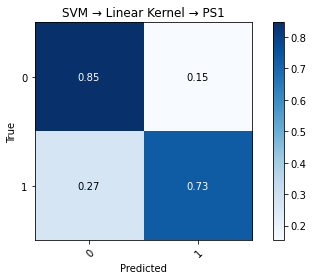

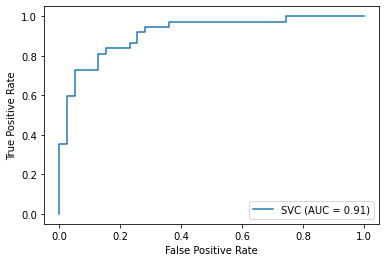

In [14]:
# Parameter Set 1
svc_lin_1 = svm.SVC(kernel='linear', C=1, gamma='auto')
svc_lin_1.fit(x_train, y_train)

svc_lin_1_y_predict = svc_lin_1.predict(x_test)
draw_confusion_matrix(y_test, svc_lin_1_y_predict, title="SVM → Linear Kernel → PS1")

do_pca_and_plot_roc(svm.SVC(kernel='linear', C=1, gamma='auto'))

Accuracy = 0.8026315789473685
Confusion Matrix = 
[[0.846 0.154]
 [0.243 0.757]]


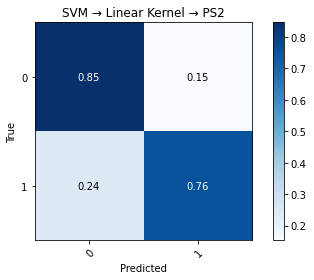

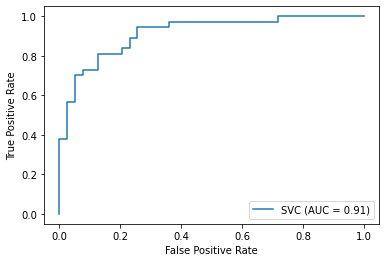

In [15]:
# Parameter Set 2
svc_lin_2 = svm.SVC(kernel='linear', C=5, gamma='scale')
svc_lin_2.fit(x_train, y_train)

svc_lin_2_y_predict = svc_lin_2.predict(x_test)
draw_confusion_matrix(y_test, svc_lin_2_y_predict, title="SVM → Linear Kernel → PS2")

do_pca_and_plot_roc(svm.SVC(kernel='linear', C=5, gamma='scale'))

Accuracy = 0.8026315789473685
Confusion Matrix = 
[[0.846 0.154]
 [0.243 0.757]]


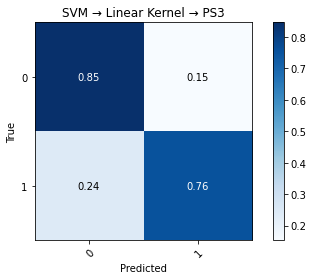

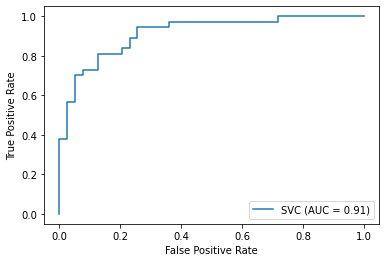

In [16]:
# Parameter Set 3
svc_lin_3 = svm.SVC(kernel='linear', C=10, gamma=0.1)
svc_lin_3.fit(x_train, y_train)

svc_lin_3_y_predict = svc_lin_3.predict(x_test)
draw_confusion_matrix(y_test, svc_lin_3_y_predict, title="SVM → Linear Kernel → PS3")

do_pca_and_plot_roc(svm.SVC(kernel='linear', C=10, gamma=0.1))

## SVM → RBF Kernel

Accuracy = 0.881578947368421
Confusion Matrix = 
[[0.897 0.103]
 [0.135 0.865]]


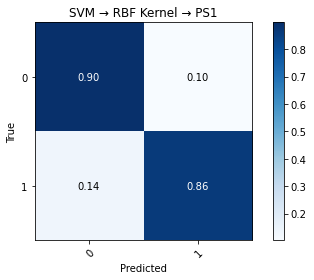

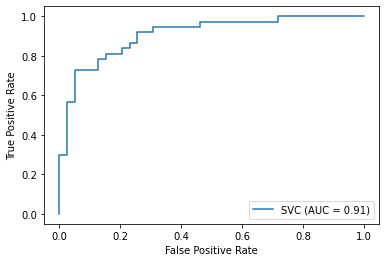

In [17]:
# Parameter Set 1
svc_rbf_1 = svm.SVC(kernel='rbf', C=1, gamma=0.1)
svc_rbf_1.fit(x_train, y_train)

svc_rbf_1_y_predict = svc_rbf_1.predict(x_test)
draw_confusion_matrix(y_test, svc_rbf_1_y_predict, title="SVM → RBF Kernel → PS1")

do_pca_and_plot_roc(svm.SVC(kernel='rbf', C=1, gamma=0.1))

Accuracy = 0.7894736842105263
Confusion Matrix = 
[[0.821 0.179]
 [0.243 0.757]]


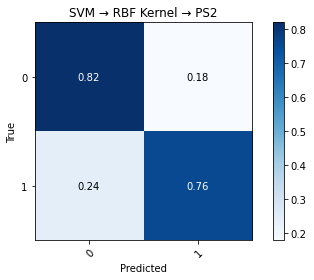

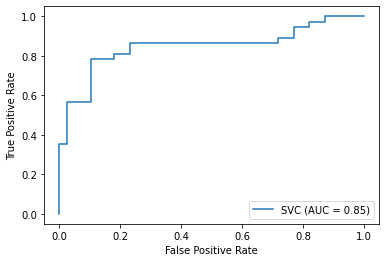

In [18]:
# Parameter Set 2
svc_rbf_2 = svm.SVC(kernel='rbf', C=5, gamma='auto')
svc_rbf_2.fit(x_train, y_train)

svc_rbf_2_y_predict = svc_rbf_2.predict(x_test)
draw_confusion_matrix(y_test, svc_rbf_2_y_predict, title="SVM → RBF Kernel → PS2")

do_pca_and_plot_roc(svm.SVC(kernel='rbf', C=5, gamma='auto'))

Accuracy = 0.8026315789473685
Confusion Matrix = 
[[0.846 0.154]
 [0.243 0.757]]


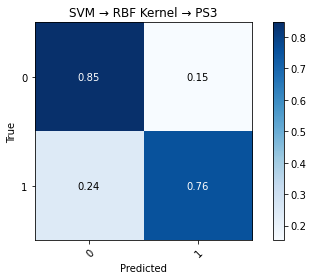

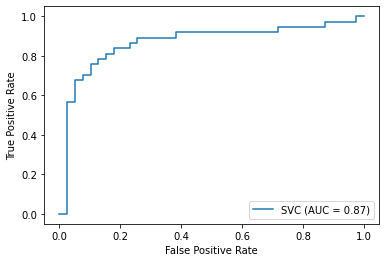

In [19]:
# Parameter Set 3
svc_rbf_3 = svm.SVC(kernel='rbf', C=10, gamma='scale')
svc_rbf_3.fit(x_train, y_train)

svc_rbf_3_y_predict = svc_rbf_3.predict(x_test)
draw_confusion_matrix(y_test, svc_rbf_3_y_predict, title="SVM → RBF Kernel → PS3")

do_pca_and_plot_roc(svm.SVC(kernel='rbf', C=10, gamma='scale'))

## SVM → Poly Kernel

Accuracy = 0.868421052631579
Confusion Matrix = 
[[0.923 0.077]
 [0.189 0.811]]


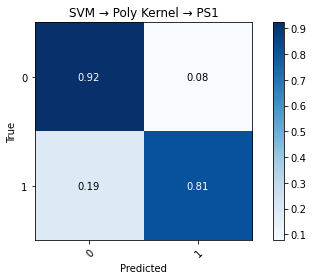

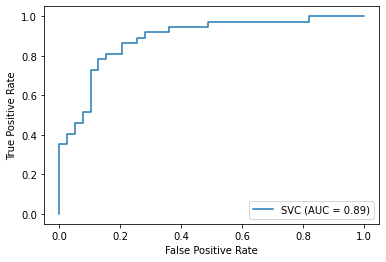

In [20]:
# Parameter Set 1
svc_poly_1 = svm.SVC(kernel='poly', C=1, gamma='auto', degree=3)
svc_poly_1.fit(x_train, y_train)

svc_poly_1_y_predict = svc_poly_1.predict(x_test)
draw_confusion_matrix(y_test, svc_poly_1_y_predict, title="SVM → Poly Kernel → PS1")

do_pca_and_plot_roc(svm.SVC(kernel='poly', C=1, gamma='auto', degree=3))

Accuracy = 0.6578947368421053
Confusion Matrix = 
[[0.667 0.333]
 [0.351 0.649]]


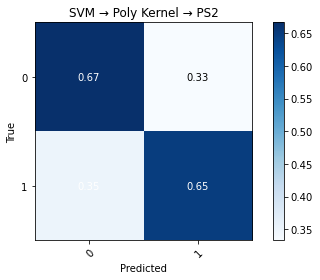

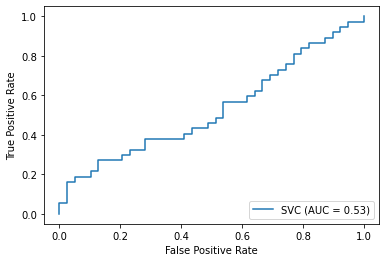

In [21]:
# Parameter Set 2
svc_poly_2 = svm.SVC(kernel='poly', C=5, gamma='scale', degree=2)
svc_poly_2.fit(x_train, y_train)

svc_poly_2_y_predict = svc_poly_2.predict(x_test)
draw_confusion_matrix(y_test, svc_poly_2_y_predict, title="SVM → Poly Kernel → PS2")

do_pca_and_plot_roc(svm.SVC(kernel='poly', C=5, gamma='scale', degree=2))

Accuracy = 0.8421052631578947
Confusion Matrix = 
[[0.821 0.179]
 [0.135 0.865]]


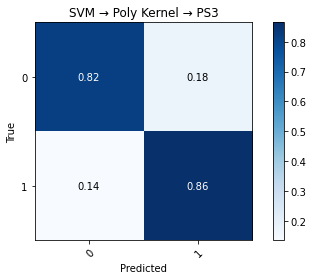

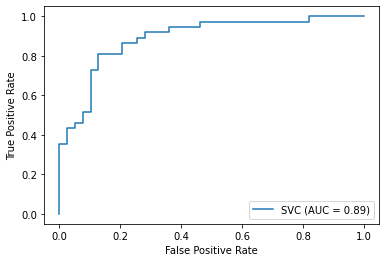

In [22]:
# Parameter Set 1
svc_poly_3 = svm.SVC(kernel='poly', C=10, gamma='scale', degree=3)
svc_poly_3.fit(x_train, y_train)

svc_poly_3_y_predict = svc_poly_3.predict(x_test)
draw_confusion_matrix(y_test, svc_poly_3_y_predict, title="SVM → Poly Kernel → PS3")

do_pca_and_plot_roc(svm.SVC(kernel='poly', C=10, gamma='scale', degree=3))

## SVM → Sigmoid Kernel

Accuracy = 0.8157894736842105
Confusion Matrix = 
[[0.821 0.179]
 [0.189 0.811]]


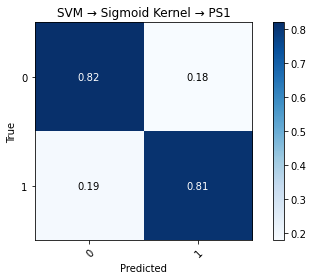

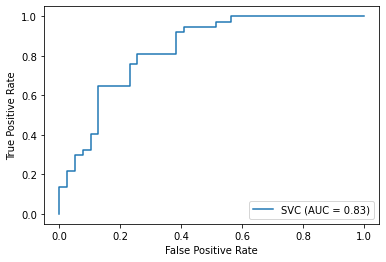

In [23]:
# Parameter Set 1
svc_sig_1 = svm.SVC(kernel='sigmoid', C=1, gamma='auto', coef0=0.5)
svc_sig_1.fit(x_train, y_train)

svc_sig_1_y_predict = svc_sig_1.predict(x_test)
draw_confusion_matrix(y_test, svc_sig_1_y_predict, title="SVM → Sigmoid Kernel → PS1")

do_pca_and_plot_roc(svm.SVC(kernel='sigmoid', C=1, gamma='auto', coef0=0.5))

Accuracy = 0.7763157894736842
Confusion Matrix = 
[[0.821 0.179]
 [0.27  0.73 ]]


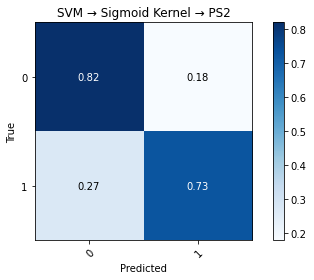

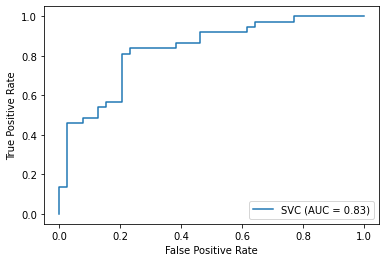

In [24]:
# Parameter Set 2
svc_sig_2 = svm.SVC(kernel='sigmoid', C=5, gamma='scale')
svc_sig_2.fit(x_train, y_train)

svc_sig_2_y_predict = svc_sig_2.predict(x_test)
draw_confusion_matrix(y_test, svc_sig_2_y_predict, title="SVM → Sigmoid Kernel → PS2")

do_pca_and_plot_roc(svm.SVC(kernel='sigmoid', C=5, gamma='scale'))

Accuracy = 0.7631578947368421
Confusion Matrix = 
[[0.795 0.205]
 [0.27  0.73 ]]


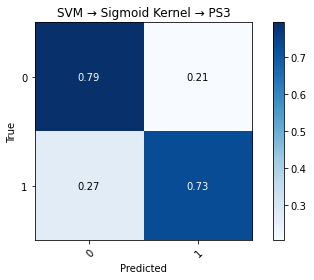

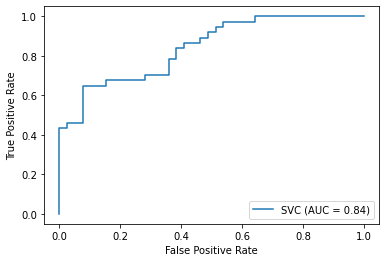

In [25]:
# Parameter Set 3
svc_sig_3 = svm.SVC(kernel='sigmoid', C=10, gamma='auto', coef0=0.1)
svc_sig_3.fit(x_train, y_train)

svc_sig_3_y_predict = svc_sig_3.predict(x_test)
draw_confusion_matrix(y_test, svc_sig_3_y_predict, title="SVM → Sigmoid Kernel → PS3")

do_pca_and_plot_roc(svm.SVC(kernel='sigmoid', C=10, gamma='auto', coef0=0.1))

## SVM > Best value of parameters for all kernels using Grid Search CV

Accuracy = 0.7631578947368421
Confusion Matrix = 
[[0.872 0.128]
 [0.351 0.649]]


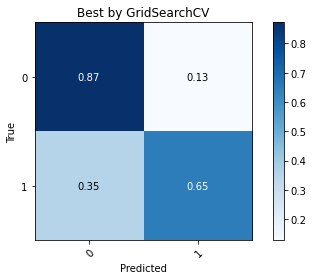

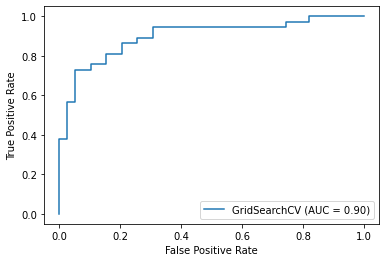

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
    'C':list(range(1, 11)),
    'gamma': ['auto', 'scale'],
    'degree': [2, 3],
    'coef0': [0.0, 0.1, 0.3, 0.5, 0.8]
}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
clf_predict = clf.predict(x_test)
draw_confusion_matrix(y_test, clf_predict, title="Best by GridSearchCV")

do_pca_and_plot_roc(clf)

In [27]:
print("Best Params:")
clf.best_params_

Best Params:


{'C': 1, 'coef0': 0.8, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [28]:
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'coef0': [0.0, 0.1, 0.3, 0.5, 0.8], 'degree': [2, 3],
                         'gamma': ['auto', 'scale'],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

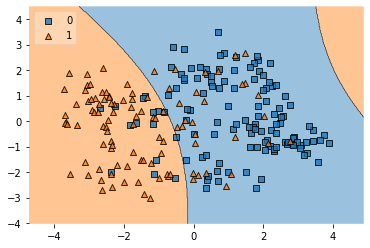

In [29]:
do_pca_and_plot_decision_regions(clf)

# Decision Tree

In [30]:
from sklearn import tree

Accuracy = 0.7763157894736842
Confusion Matrix = 
[[0.769 0.231]
 [0.216 0.784]]


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Predicted', ylabel='True'>

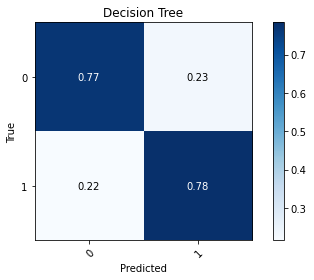

In [31]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree_y_predict = dtree.predict(x_test)
draw_confusion_matrix(y_test, dtree_y_predict, title="Decision Tree")

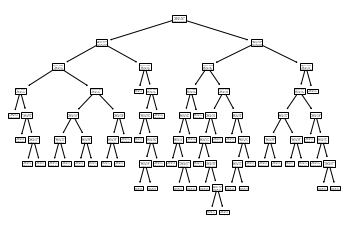

In [32]:
_ = tree.plot_tree(dtree)

In [33]:
# pruning

path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [34]:
def accuracy(_tree_):
    y_pred = _tree_.predict(x_test)
    return np.sum(y_test == y_pred) / len(y_test)

dtrees_acc_dict = {}
for ccp_alpha in ccp_alphas:
    dtree_ = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree_.fit(x_train, y_train)
    acc = accuracy(dtree_)
    dtrees_acc_dict[ccp_alpha] = acc

dtree_alphas = list(dtrees_acc_dict.keys())
dtree_accuracies = list(dtrees_acc_dict.values())

max_dree = max(dtrees_acc_dict, key=dtrees_acc_dict.get)

print(f'Max accurasy = {dtrees_acc_dict[max_dree] * 100}% with alpha {max_dree}')


Max accurasy = 84.21052631578947% with alpha 0.007831620166421928


Text(0.5, 1.0, 'Accuracy vs Effective alpha for training set')

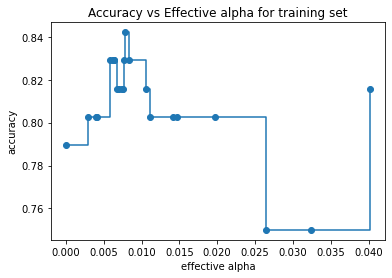

In [35]:
fig, ax = plt.subplots()
ax.plot(dtree_alphas[:-1], dtree_accuracies[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Effective alpha for training set")

In [36]:
# cross validiation (cv = 5)

from sklearn.model_selection import cross_val_score


dtrees_acc_dict = {}
for ccp_alpha in ccp_alphas:
    dtree_ = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree_.fit(x_train, y_train)
    scores = cross_val_score(dtree_, data, to_predict, cv=5)
    dtrees_acc_dict[ccp_alpha] = scores

dtree_alphas = list(dtrees_acc_dict.keys())
dtree_scores = list(dtrees_acc_dict.values())

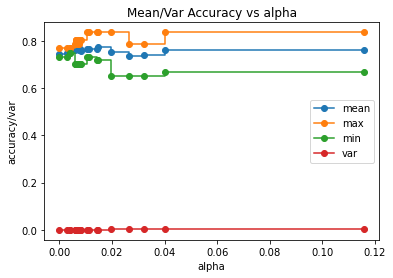

In [58]:
mean_scores = [dtrees_acc_dict[alfa].mean() for alfa in dtrees_acc_dict]
max_scores = [dtrees_acc_dict[alfa].max() for alfa in dtrees_acc_dict]
min_scores = [dtrees_acc_dict[alfa].min() for alfa in dtrees_acc_dict]
var_scores = [dtrees_acc_dict[alfa].var() for alfa in dtrees_acc_dict]

deb = [x for x in dtrees_acc_dict]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy/var")
ax.set_title("Mean/Var Accuracy vs alpha")
ax.plot(dtree_alphas, mean_scores, marker='o', label="mean",
        drawstyle="steps-post")
ax.plot(dtree_alphas, max_scores, marker='o', label="max",
        drawstyle="steps-post")
ax.plot(dtree_alphas, min_scores, marker='o', label="min",
        drawstyle="steps-post")
ax.plot(dtree_alphas, var_scores, marker='o', label="var",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [59]:
best_alpha_mean = max(dtrees_acc_dict, key= lambda x: dtrees_acc_dict[x].mean())
best_alpha_max = max(dtrees_acc_dict, key= lambda x: dtrees_acc_dict[x].max())

print(f'Best alhpa by mean score = {best_alpha_mean} -> score: {dtrees_acc_dict[best_alpha_mean].mean()}')

Best alhpa by mean score = 0.007048458149779734 -> score: 0.7720765027322404


Accuracy = 0.8157894736842105
Confusion Matrix = 
[[0.872 0.128]
 [0.243 0.757]]


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Predicted', ylabel='True'>

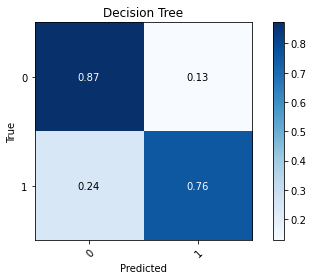

In [60]:
# By best alpha

dtree = tree.DecisionTreeClassifier(ccp_alpha=0.007048458149779734)
dtree.fit(x_train, y_train)

dtree_y_predict = dtree.predict(x_test)
draw_confusion_matrix(y_test, dtree_y_predict, title="Decision Tree")

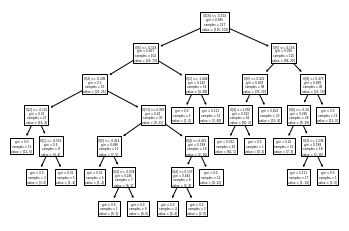

In [61]:
_ = tree.plot_tree(dtree)